## Quellen: 
[1] [Raupp et al., "Bearings’ Vibration Fault Detection via Physics-Informed Deep Learning", PSAM17 & ASRAM2024, 2024.](https://iapsam.org/PSAM17/program/Papers/PSAM17&ASRAM2024-1247.pdf)

[2] [Sinitsin, V., Ibryaeva, O., Sakovskaya, V., & Eremeeva, V. (2024). Intelligent Bearing Fault Diagnosis Method Combining Mixed Input and Hybrid CNN-MLP model. School of Electronic Engineering and Computer Science, South Ural State University, Chelyabinsk, Russia.](https://arxiv.org/pdf/2112.08673)

[3] [The Hilbert-Huang Transform - emd docs](https://emd.readthedocs.io/en/stable/emd_tutorials/02_spectrum_analysis/emd_tutorial_02_spectrum_01_hilberthuang.html#sphx-glr-emd-tutorials-02-spectrum-analysis-emd-tutorial-02-spectrum-01-hilberthuang-py)

In [152]:
%pip install numpy pandas scipy librosa matplotlib tensorflow emd

In [153]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import librosa
import librosa.display
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split


In [154]:
SR = 44100 #Samplerate
DATA_DIR = "data/Datasets 1- Data acquisition using the stethoscope"

In [155]:
data = []
c11 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/First speed - 648 rpm.mat")
c12 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/Second speed - 1236rpm.mat")
c13 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/Third speed - 1812rpm.mat")

c21 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/First speed - 642 rpm.mat")
c22 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/Second speed - 1236 rpm.mat")
c23 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/Third speed - 1809 rpm.mat")

c31 = loadmat(DATA_DIR+"/Case 3 - Ball fault/First speed - 636 rpm.mat")
c32 = loadmat(DATA_DIR+"/Case 3 - Ball fault/Second speed - 1230 rpm.mat")
c33 = loadmat(DATA_DIR+"/Case 3 - Ball fault/Third speed - 1812 rpm.mat")

c41 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/First speed - 636 rpm.mat")
c42 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/Second speed - 1230 rpm.mat")
c43 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/Third speed - 1812 rpm.mat")

c51 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-600rpm.mat")
c52 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-1200rpm.mat")
c53 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-1800rpm.mat")

c61 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-600rpm.mat")
c62 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-1200rpm.mat")
c63 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-1800rpm.mat")


In [156]:
data_list = [
    {"label": "Inner race fault", "rpm": 648, "data": c11["x"].flatten()},
    {"label": "Inner race fault", "rpm": 1236, "data": c12["x"].flatten()},
    {"label": "Inner race fault", "rpm": 1812, "data": c13["x"].flatten()},
    {"label": "Outer race fault", "rpm": 642, "data": c21["x"].flatten()},
    {"label": "Outer race fault", "rpm": 1236, "data": c22["x"].flatten()},
    {"label": "Outer race fault", "rpm": 1809, "data": c23["x"].flatten()},
    {"label": "Ball fault", "rpm": 636, "data": c31["x"].flatten()},
    {"label": "Ball fault", "rpm": 1230, "data": c32["x"].flatten()},
    {"label": "Ball fault", "rpm": 1812, "data": c33["x"].flatten()},
    {"label": "Healthy", "rpm": 636, "data": c41["x"].flatten()},
    {"label": "Healthy", "rpm": 1230, "data": c42["x"].flatten()},
    {"label": "Healthy", "rpm": 1812, "data": c43["x"].flatten()},
    {"label": "Looseness fault", "rpm": 600, "data": c51["x"].flatten()},
    {"label": "Looseness fault", "rpm": 1200, "data": c52["x"].flatten()},
    {"label": "Looseness fault", "rpm": 1800, "data": c53["x"].flatten()},
    {"label": "Combined faults", "rpm": 600, "data": c61["x"].flatten()},
    {"label": "Combined faults", "rpm": 1200, "data": c62["x"].flatten()},
    {"label": "Combined faults", "rpm": 1800, "data": c63["x"].flatten()},
]

df = pd.DataFrame(data_list)
df

,label,rpm,data
0,Inner race fault,648,"[0.08636474609375, 0.083038330078125, 0.075958..."
1,Inner race fault,1236,"[0.174530029296875, 0.188262939453125, 0.19223..."
2,Inner race fault,1812,"[0.1209716796875, 0.128936767578125, 0.1336364..."
3,Outer race fault,642,"[-0.0635986328125, -0.05096435546875, -0.03335..."
4,Outer race fault,1236,"[0.091400146484375, 0.04150390625, -0.02258300..."
5,Outer race fault,1809,"[-0.163360595703125, -0.189208984375, -0.19415..."
6,Ball fault,636,"[0.03448486328125, 0.003753662109375, 0.043609..."
7,Ball fault,1230,"[-0.36395263671875, -0.34356689453125, -0.3076..."
8,Ball fault,1812,"[0.006011962890625, 0.005584716796875, 0.00485..."
9,Healthy,636,"[-0.00146484375, -0.0048828125, -0.0029296875,..."


# Data Organisation

In [157]:
def split_into_samples(signal, sr, sample_length_ms=125):
    sample_size = int(sr * (sample_length_ms / 1000))
    num_samples = len(signal) // sample_size
    samples = np.array_split(signal[:num_samples * sample_size], num_samples)
    return samples

In [158]:
samples_list = []
for idx, row in df.iterrows():
    samples = split_into_samples(row["data"], SR, sample_length_ms=125)
    for sample in samples:
        samples_list.append({
            "label": row["label"],
            "rpm": row["rpm"],
            "data": sample
        })

samples_df = pd.DataFrame(samples_list)
samples_df

,label,rpm,data
0,Inner race fault,648,"[0.08636474609375, 0.083038330078125, 0.075958..."
1,Inner race fault,648,"[0.257354736328125, 0.254486083984375, 0.24627..."
2,Inner race fault,648,"[0.032806396484375, 0.05303955078125, 0.074188..."
3,Inner race fault,648,"[0.008880615234375, 0.000762939453125, -0.0036..."
4,Inner race fault,648,"[-0.11944580078125, -0.115234375, -0.105895996..."
...,...,...,...
2635,Combined faults,1800,"[-0.152252197265625, -0.2003173828125, -0.2446..."
2636,Combined faults,1800,"[0.047393798828125, 0.042877197265625, 0.04406..."
2637,Combined faults,1800,"[-0.02508544921875, -0.004241943359375, 0.0288..."
2638,Combined faults,1800,"[0.0330810546875, 0.09698486328125, 0.14532470..."


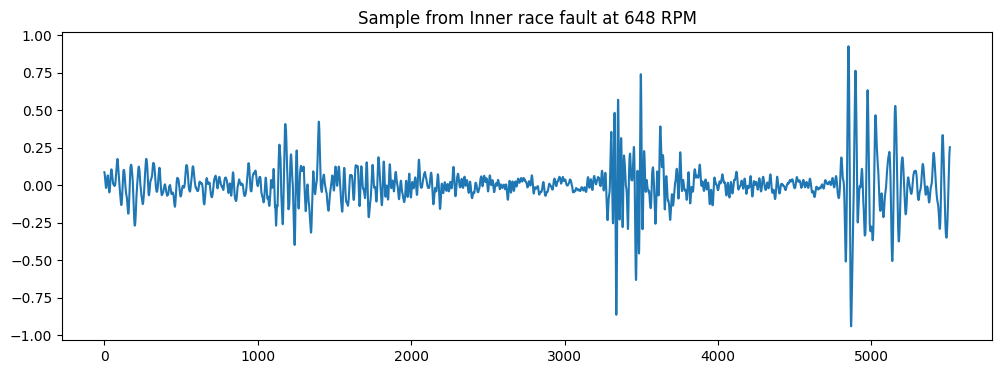

In [159]:
plt.figure(figsize=(12, 4))
plt.title(f"Sample from {samples_df.iloc[0]['label']} at {samples_df.iloc[0]['rpm']} RPM")
plt.plot(samples_df.iloc[0]["data"])

Akuelle habe ich in jedem Sample ein Array mit 1D Amplitudenwerten. 


## Hilbert Huang Transformation (HHT)


In [1] und [2] wird HHT für Data Preprocessing verwendet, desewegen halte ich es für eine gute Idee das auch zu probieren.
Jetzt werde ich eine Hilbert Huang Transformation (HHT), wie in [3] erklärt, auf meinen Daten durchführen um sie in eine 2D Image zu transformieren das ich in einem CNN verwenden kann. HHT gibt mir ein Bild in dem ich erkennen kann wie sich Frequenzen und Amplituden im Signal über die Zeit verändern.

In [160]:
import emd
import numpy as np
from scipy import ndimage

### IMFs
Als erstes extrahieren ich die IMFs (Intrinsic Mode Funcitons).
IMFs (Intrinsic Mode Functions) sind die einzelnen, voneinander getrennten Schwingungskomponenten, die beim Empirical Mode Decomposition (EMD) aus einem komplexen Signal extrahiert werden.

Eigenschaften von IMFs:

Jede IMF ist eine "einfache" Schwingung, ähnlich wie eine Welle mit variabler Frequenz und Amplitude.
Die Summe aller IMFs ergibt wieder das Originalsignal.
IMFs sind lokal und adaptiv: Sie passen sich den Eigenschaften des Signals an und sind besonders geeignet für nichtlineare und nichtstationäre Daten.
Nutzen:
Mit IMFs kannst du analysieren, wie sich verschiedene Frequenzanteile im Signal über die Zeit verändern – das ist die Grundlage für die Hilbert-Huang-Transformation (HHT).

In [2] wird die Anzahl der IMFs auf 3 limitiert um Rechenleistung ein zu sparen. Für meine Tests werde ich erstmal kein eigenes Limit einstellen.

<Axes: xlabel='Time (samples)'>

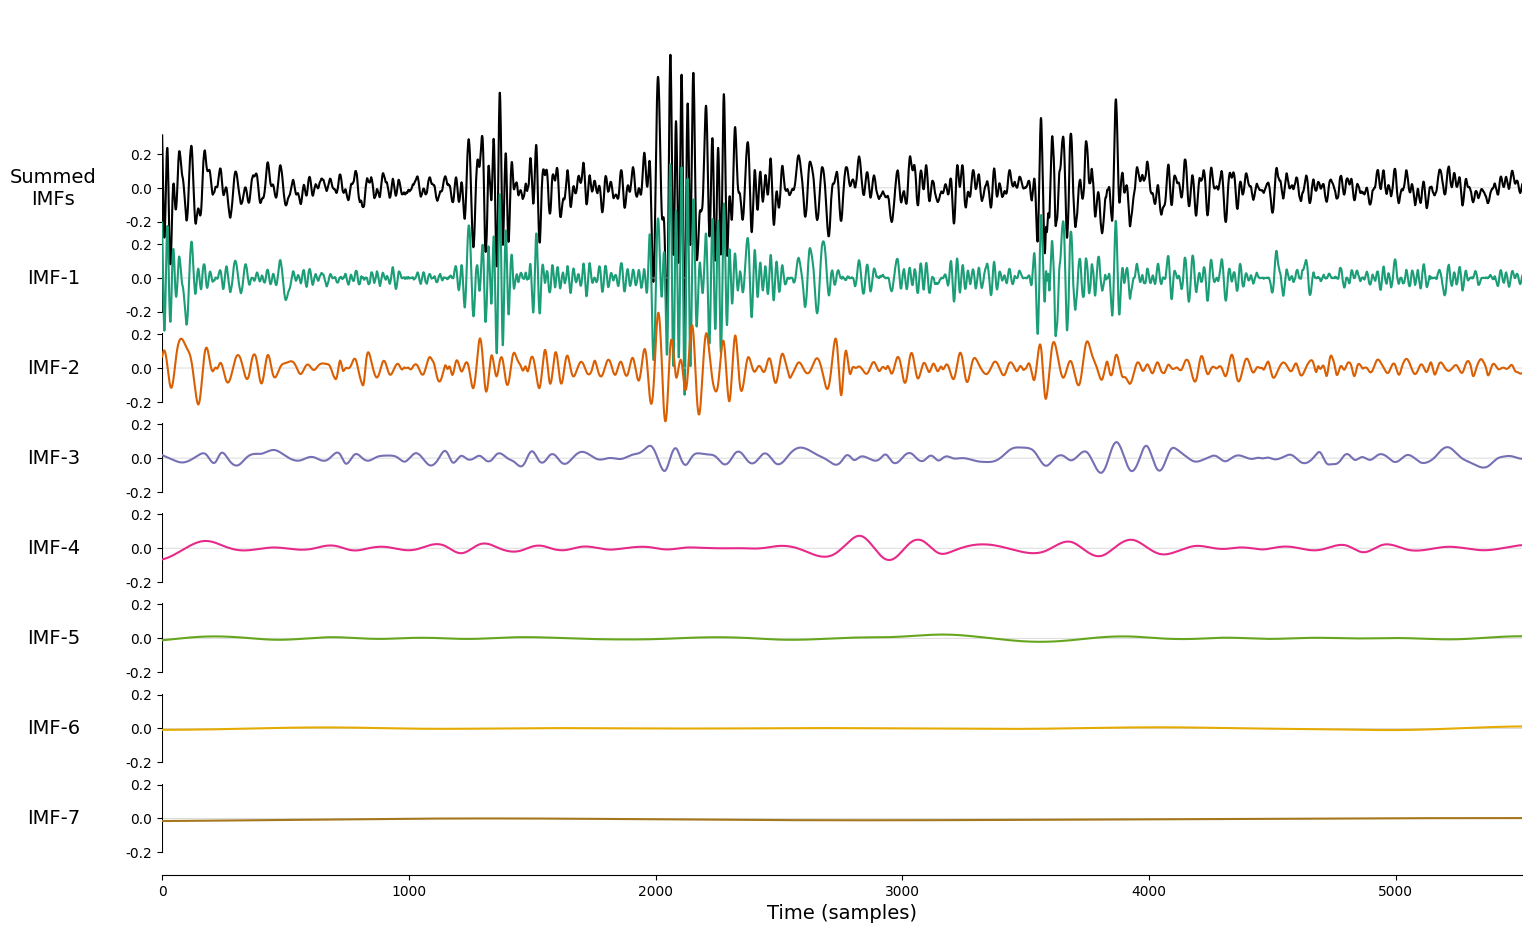

In [227]:
imf = emd.sift.sift(samples_df.iloc[141]["data"])
emd.plotting.plot_imfs(imf[:SR*3, :])


### 1d frequency transform
Jetzt berechne ich den Frequenzinhalt der IMFs. Das heißt die "instantanoues pahse", Frequenz und Amplitude jedes IMF. 

In [228]:
IP, IF, IA = emd.spectra.frequency_transform(imf, SR, "nht")

Text(0.5, 0, 'Frequency (Hz)')

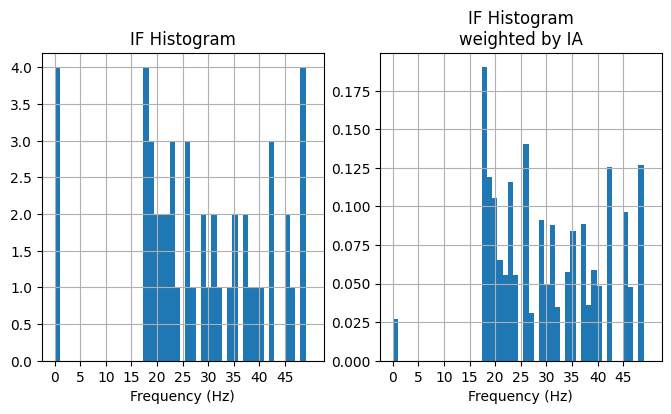

In [229]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
# Plot a simple histogram using frequency bins from 0-20Hz
plt.hist(IF[:, 2], np.linspace(0, 50))
plt.grid(True)
plt.title('IF Histogram')
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Frequency (Hz)')

plt.subplot(122)
# Plot an amplitude-weighted histogram using frequency bins from 0-20Hz
plt.hist(IF[:, 2], np.linspace(0, 50), weights=IA[:, 2])
plt.grid(True)
plt.title('IF Histogram\nweighted by IA')
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Frequency (Hz)')

In [230]:
freq_edges, freq_centres = emd.spectra.define_hist_bins(0, 100, 128, 'linear')

# Amplitude weighted HHT per IMF
f, spec_weighted = emd.spectra.hilberthuang(IF, IA, freq_edges, sum_imfs=False)

# Unweighted HHT per IMF - we replace the instantaneous amplitude values with ones
f, spec_unweighted = emd.spectra.hilberthuang(IF, np.ones_like(IA), freq_edges, sum_imfs=False)

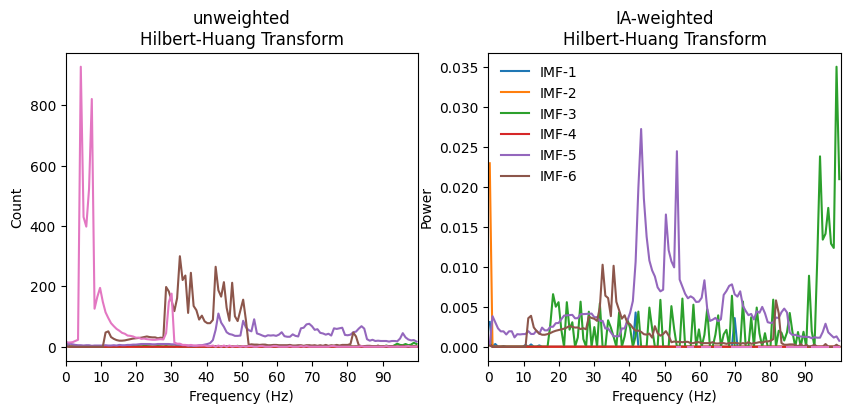

In [231]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=0.4)
plt.subplot(121)
plt.plot(freq_centres, spec_unweighted)
plt.xticks(np.arange(10)*10)
plt.xlim(0, 100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.title('unweighted\nHilbert-Huang Transform')

plt.subplot(122)
plt.plot(freq_centres, spec_weighted)
plt.xticks(np.arange(10)*10)
plt.xlim(0, 100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('IA-weighted\nHilbert-Huang Transform')
plt.legend(['IMF-1', 'IMF-2', 'IMF-3', 'IMF-4', 'IMF-5', "IMF-6"], frameon=False)

In [232]:
# Carrier frequency histogram definition
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 0, 10, 'linear')

f, hht = emd.spectra.hilberthuang(IF[:, 0, None], IA[:, 0, None], freq_edges, mode='amplitude', sum_time=False)
time_centres = np.arange(201)-.5

Text(0, 0.5, 'Frequency (Hz)')

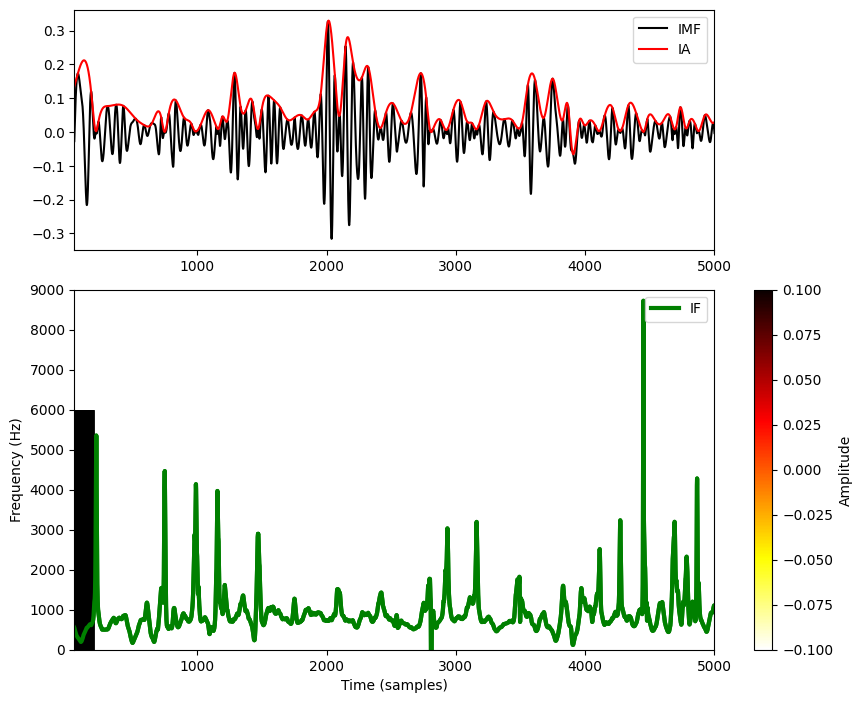

In [233]:
plt.figure(figsize=(10, 8))
# Add signal and IA
index = 1
plt.axes([.1, .6, .64, .3])
plt.plot(imf[:, index], 'k')
plt.plot(IA[:, index], 'r')
plt.legend(['IMF', 'IA'])
plt.xlim(50, 5000)

# Add IF axis and legend
plt.axes([.1, .1, .8, .45])
plt.plot(IF[:, index], 'g', linewidth=3)
plt.legend(['IF'])

# Plot HHT (angepasst für 0-5000 Hz)
plt.pcolormesh(time_centres, freq_edges, hht[:, :200], cmap='hot_r', vmin=0)

# Set colourbar
cb = plt.colorbar()
cb.set_label('Amplitude', rotation=90)

# Add some grid lines
for ii in range(len(freq_edges)):
    plt.plot((0, 200), (freq_edges[ii], freq_edges[ii]), 'k', linewidth=.5)
for ii in range(200):
    plt.plot((ii, ii), (0, 6000), 'k', linewidth=.5)

# Overlay the IF again for better visualisation
plt.plot(IF[:, index], 'g', linewidth=3)

# Set lims and labels
plt.xlim(50, 5000)
plt.ylim(0, 9000)
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')

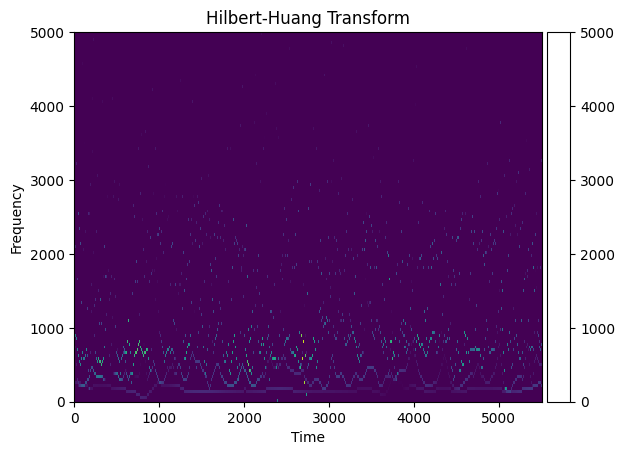

In [258]:
imf = emd.sift.sift(samples_df.iloc[2000]["data"])
IP, IF, IA = emd.spectra.frequency_transform(imf, SR, "nht")
num_imfs = 4  # Anzahl der IMFs für das Hilbert Spectrum
freq_edges, freq_centres = emd.spectra.define_hist_bins(0, 5000, 125, 'linear')
time_centres = np.arange(IF.shape[0])

# Hilbert Spectrum (Summe der ersten 4 IMFs)
f, hht = emd.spectra.hilberthuang(
    IF[:, :num_imfs], 
    IA[:, :num_imfs], 
    freq_edges, 
    mode='amplitude', 
    sum_imfs=True, 
    sum_time=False
)

emd.plotting.plot_hilberthuang(hht, time_centres, freq_centres, cmap='viridis',)
plt.ylim(0, 5000)
plt.show()

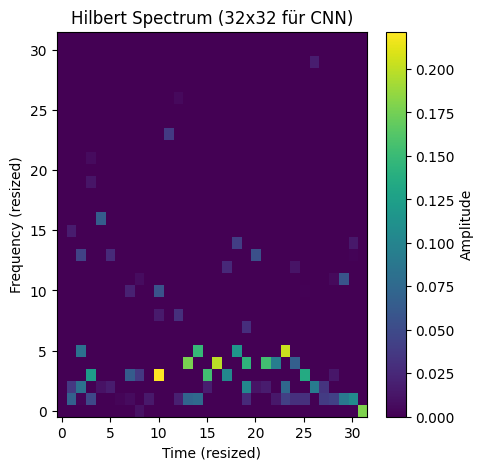

In [259]:
import scipy.ndimage

# ...vorherige Berechnung von imf, IF, IA...

num_imfs = 4  # Anzahl der IMFs für das Hilbert Spectrum
freq_edges, freq_centres = emd.spectra.define_hist_bins(0, 5000, 128, 'linear')
time_centres = np.arange(IF.shape[0])

# Hilbert Spectrum (Summe der ersten 4 IMFs)
f, hht = emd.spectra.hilberthuang(
    IF[:, :num_imfs], 
    IA[:, :num_imfs], 
    freq_edges, 
    mode='amplitude', 
    sum_imfs=True, 
    sum_time=False
)

# Auf 32x32 runterskalieren (z.B. mit scipy.ndimage.zoom)
hht_32x32 = scipy.ndimage.zoom(hht, (32/hht.shape[0], 32/hht.shape[1]), order=1)

plt.figure(figsize=(5, 5))
plt.imshow(hht_32x32, aspect='auto', origin='lower', cmap='viridis')
plt.title("Hilbert Spectrum (32x32 für CNN)")
plt.xlabel("Time (resized)")
plt.ylabel("Frequency (resized)")
plt.colorbar(label="Amplitude")
plt.show()

# hht_32x32 ist jetzt dein 32x32 Input für das CNN

In [260]:
# DataFrame für die 32x32 HHT-Images
cnn_images = []

num_imfs = 4
freq_edges, freq_centres = emd.spectra.define_hist_bins(0, 5000, 128, 'linear')

for idx, row in samples_df.iterrows():
    # EMD und Frequenztransformation
    imf = emd.sift.sift(row["data"])
    IP, IF, IA = emd.spectra.frequency_transform(imf, SR, "nht")
    # Prüfe, ob genug IMFs vorhanden sind
    if IF.shape[1] < num_imfs or IA.shape[1] < num_imfs:
        continue
    # Hilbert Spectrum (Summe der ersten 4 IMFs)
    f, hht = emd.spectra.hilberthuang(
        IF[:, :num_imfs],
        IA[:, :num_imfs],
        freq_edges,
        mode='amplitude',
        sum_imfs=True,
        sum_time=False
    )
    # Auf 32x32 runterskalieren
    hht_32x32 = scipy.ndimage.zoom(hht, (32/hht.shape[0], 32/hht.shape[1]), order=1)
    # Speichern im neuen DataFrame
    cnn_images.append({
        "label": row["label"],
        "rpm": row["rpm"],
        "hht_32x32": hht_32x32
    })

cnn_df = pd.DataFrame(cnn_images)
cnn_df.head()

,label,rpm,hht_32x32
0,Inner race fault,648,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Inner race fault,648,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Inner race fault,648,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Inner race fault,648,"[[0.03523622483739931, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,Inner race fault,648,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [270]:
from sklearn.model_selection import train_test_split


In [291]:

# X und y vorbereiten
X = np.stack(cnn_df["hht_32x32"].values)  # shape: (samples, 32, 32)
X = X[..., np.newaxis]  # shape: (samples, 32, 32, 1)
y = cnn_df["label"].astype("category").cat.codes  # shape: (samples,)

# Split in Training und Test (z.B. 80%/20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2112, 32, 32, 1) (2112,)
Test shape: (528, 32, 32, 1) (528,)


In [296]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Beispiel: X = np.stack(cnn_df["hht_32x32"].values)  # shape: (samples, 32, 32)
# y = cnn_df["label"].astype("category").cat.codes    # shape: (samples,)

# Falls nötig, X auf shape (samples, 32, 32, 1) bringen:
# X = X[..., np.newaxis]

softmax_model = models.Sequential([
    layers.Input(shape=(32, 32, 1)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # 16@16x16
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # 32@8x8
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # 64@4x4
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 Klassen
])

softmax_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

softmax_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,886 (155.80 KB)

 Trainable params: 39,886 (155.80 KB)

 Non-trainable params: 0 (0.00 B)

In [293]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Epoch 1/40


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2822 - loss: 1.6387 - val_accuracy: 0.3750 - val_loss: 1.3445
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4318 - loss: 1.2964 - val_accuracy: 0.4318 - val_loss: 1.2600
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4612 - loss: 1.2264 - val_accuracy: 0.4640 - val_loss: 1.1640
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4692 - loss: 1.1833 - val_accuracy: 0.4356 - val_loss: 1.1665
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4834 - loss: 1.1509 - val_accuracy: 0.4792 - val_loss: 1.1669
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4882 - loss: 1.1526 - val_accuracy: 0.5000 - val_loss: 1.1137
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4995 - loss: 1.1114 - val_accuracy: 0.5265 - val_loss: 1.0468
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5218 - loss: 1.0637 - val_accuracy: 0.5511 - val_loss: 1.0131
Ep

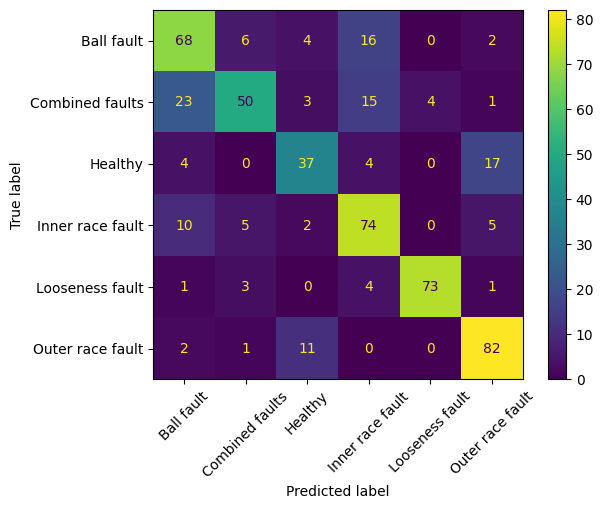

In [297]:
# Training des Modells 40 Epochen
history = softmax_model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Auswertung auf dem Testset
test_loss, test_acc = softmax_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.3f}")

# Optional: Confusion Matrix anzeigen

y_pred = softmax_model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cnn_df["label"].astype("category").cat.categories)
disp.plot(xticks_rotation=45)
plt.show()

Epoch 1/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2008 - loss: 1.7660 - val_accuracy: 0.2576 - val_loss: 1.6951
Epoch 2/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3674 - loss: 1.5701 - val_accuracy: 0.4451 - val_loss: 1.4375
Epoch 3/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4332 - loss: 1.3845 - val_accuracy: 0.4621 - val_loss: 1.3048
Epoch 4/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4479 - loss: 1.2560 - val_accuracy: 0.4792 - val_loss: 1.2492
Epoch 5/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4602 - loss: 1.1972 - val_accuracy: 0.4848 - val_loss: 1.1513
Epoch 6/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4759 - loss: 1.1600 - val_accuracy: 0.4848 - val_loss: 1.1345
Epoch 7/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4953 - loss: 1.1256 - val_accuracy: 0.5322 - val_loss: 1.0963
Epoch 8/160
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5152 - loss: 1.1016 - val_accuracy: 0.5606 - 

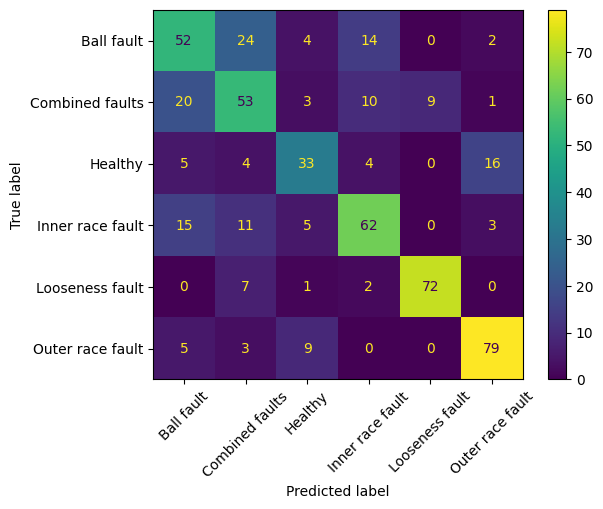

In [ ]:
# Training des Modells 160 Epochen
history = softmax_model.fit(
    X_train, y_train,
    epochs=160,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Auswertung auf dem Testset
test_loss, test_acc = softmax_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.3f}")

# Optional: Confusion Matrix anzeigen

y_pred = softmax_model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cnn_df["label"].astype("category").cat.categories)
disp.plot(xticks_rotation=45)
plt.show()

## Nur Healthy und Faulty

In [ ]:
# Labels zu "Healthy" und "Damaged" zusammenfassen
def map_label(label):
    if label == "Healthy":
        return "Healthy"
    else:
        return "Damaged"

cnn_df["binary_label"] = cnn_df["label"].apply(map_label)

# Neue Zielvariable
y_bin = cnn_df["binary_label"].astype("category").cat.codes  # 0=Damaged, 1=Healthy

# Split in Training und Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (499, 32, 32, 1) (499,)
Test shape: (125, 32, 32, 1) (125,)


In [282]:


# Beispiel: X = np.stack(cnn_df["hht_32x32"].values)  # shape: (samples, 32, 32)
# y = cnn_df["label"].astype("category").cat.codes    # shape: (samples,)

# Falls nötig, X auf shape (samples, 32, 32, 1) bringen:
# X = X[..., np.newaxis]

model = models.Sequential([
    layers.Input(shape=(32, 32, 1)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # 16@16x16
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # 32@8x8
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # 64@4x4
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binär
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,841 (155.63 KB)

 Trainable params: 39,841 (155.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9459 - loss: 0.2516 - val_accuracy: 0.7760 - val_loss: 1.4125
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9098 - loss: 0.2721 - val_accuracy: 0.8720 - val_loss: 0.4776
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9559 - loss: 0.1250 - val_accuracy: 0.9040 - val_loss: 0.5060
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9840 - loss: 0.0712 - val_accuracy: 0.9200 - val_loss: 0.4242
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9920 - loss: 0.0441 - val_accuracy: 0.9200 - val_loss: 0.4722
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9960 - loss: 0.0284 - val_accuracy: 0.9280 - val_loss: 0.5143
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9940 - loss: 0.0304 - val_accuracy: 0.9200 - val_loss: 0.5003
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9960 - loss: 0.0230 - val_accuracy: 0.9200 - val_loss: 0.5

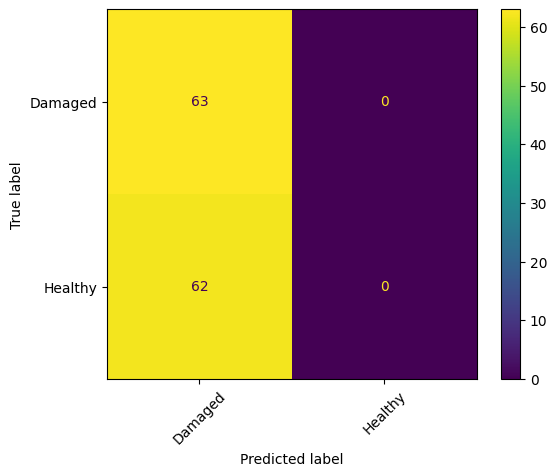

In [286]:
# Training des Modells
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Auswertung auf dem Testset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.3f}")

# Optional: Confusion Matrix anzeigen
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Damaged", "Healthy"])
disp.plot(xticks_rotation=45)
plt.show()